# Context:
The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which 
extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, 
skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and 
compactness. 

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400.
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be
readily distinguishable, but it would be more difficult to distinguish between the cars. 

# Objective: 
To classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the 
silhouette.The vehicle may be viewed from one of many different angles.

# Dataset Information:
https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)

# Steps:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully 
which all attributes have to be a part of the analysis and why 
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the 
best hyper parameters and do cross validation to find the accuracy. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = pd.read_csv('vehicle.csv')

In [12]:
dataset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [13]:
dataset.shape

(846, 19)

In [14]:
dataset.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [15]:
dataset.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [16]:
dataset['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [17]:
#Boxplot to understand spread and outliers
dataset.plot(kind='box', figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9DF3C8550>,
      dtype=object)

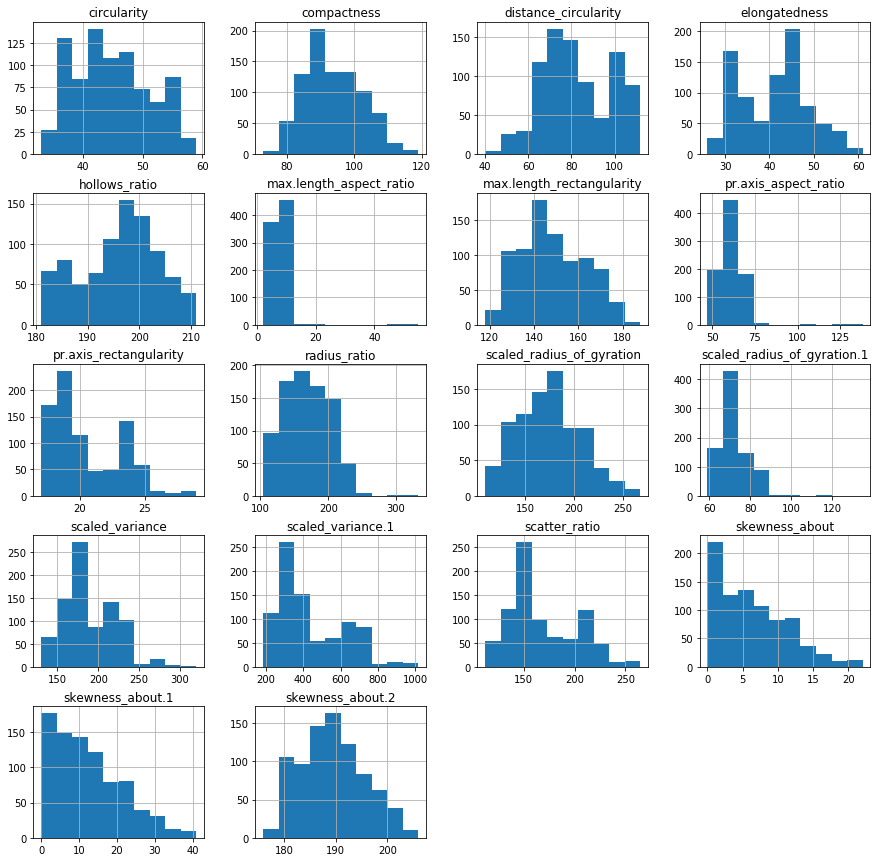

In [18]:
dataset.hist(figsize=(15,15))

In [19]:
dataset.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [20]:
#Replace missing values by median of column value
for i in dataset.columns[:17]:
    median_value = dataset[i].median()
    dataset[i] = dataset[i].fillna(median_value)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [22]:
dataset.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [23]:
#Identify outliers and replace them by median
for col_name in dataset.columns[:-1]:
    q1 = dataset[col_name].quantile(0.25)
    q3 = dataset[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    dataset.loc[(dataset[col_name] < low) | (dataset[col_name] > high), col_name] = dataset[col_name].median()

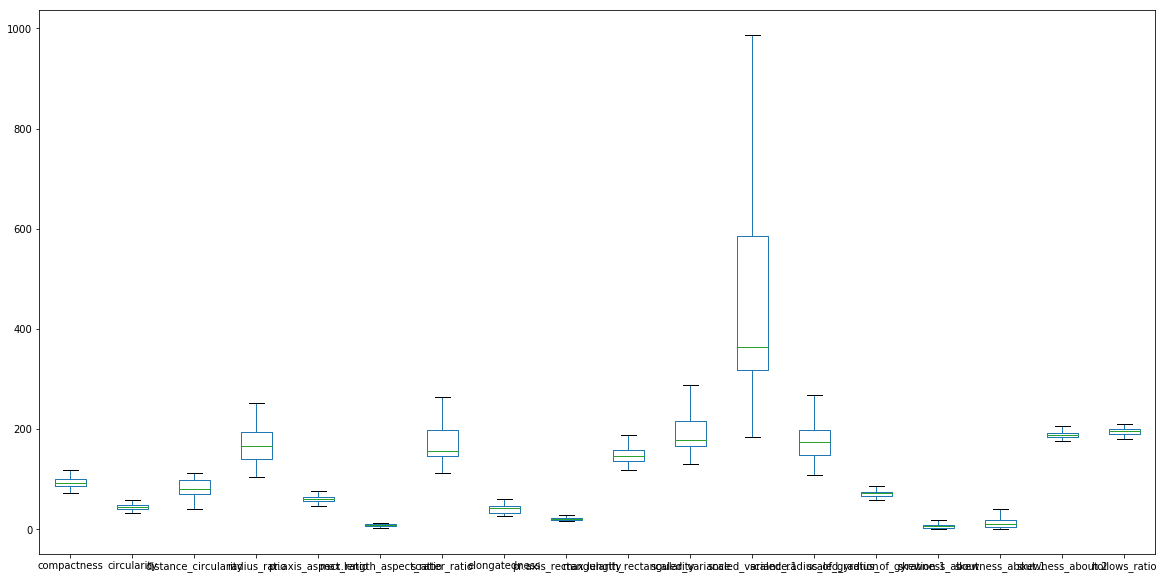

In [24]:
dataset.plot(kind='box', figsize=(20,10))

In [25]:
spd = pd.scatter_matrix(dataset, figsize = (20,20), diagonal='kde')

c:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


In [26]:
#Create and view the correlation matrix
dataset.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                              0.081898       0.064242   
skewness_about.1                            0.141664       0.211647   
skewness_about.2                            0.

In [27]:
## There are several variables that are highly correlated with each other

In [29]:
# X variables collated together
X = dataset.iloc[:,0:17]




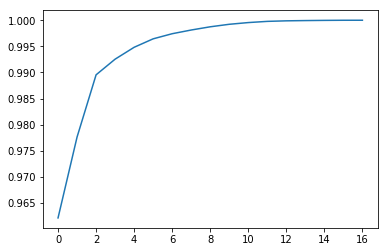

In [30]:
#Run PCA and plot to visualise the ideal number of components
from sklearn.decomposition import PCA

pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [31]:
#Based on the plot, we will select 10 components
pca = PCA(n_components=10)
pca.fit(X)

#Assign the components to the X variable
X = pca.transform(X)

In [34]:
#Split the data into training and test sets
from sklearn import model_selection
Y = dataset.iloc[:,18]
test_size = 0.2
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
## We will use the Naive Bayes & Support Vector Classifiers

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV

model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(X_train, Y_train)

print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8539823008849557, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8311111111111111, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8933333333333333, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.01, kernel=rbf, score=0.504424778761062, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5022222222222222, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5022222222222222, total=   0.0s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ... C=0.1, kernel=linear, score=0.8362831858407079, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................. C=0.1, kernel=linear, score=0.84, total=   0.4s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.8844444444444445, total=   0.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ....... C=0.1, kernel=rbf, score=0.504424778761062, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.5022222222222222, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.5022222222222222, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8495575221238938, total=   3.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   25.8s finished


Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [37]:
#Build the model with the best hyper parameters
from sklearn.cross_validation import cross_val_score

model = SVC(C=0.5, kernel="linear")

scores = cross_val_score(model, X, Y, cv=10)

print(scores)

[0.82352941 0.87058824 0.87058824 0.85882353 0.81176471 0.82352941
 0.89411765 0.83529412 0.85714286 0.85365854]


In [38]:
#Use the Naive Bayes CLassifier with k fold cross validation
model = GaussianNB()

scores = cross_val_score(model, X, Y, cv=10)

print(scores)

[0.74117647 0.78823529 0.75294118 0.75294118 0.8        0.76470588
 0.78823529 0.68235294 0.76190476 0.79268293]


In [39]:
### Since SVC gives a better performance, it can be used for final model building and prediction